# Regression

*** 

  ## Prediction of a district's median Housing price.

### Aim:
To build a Machine Learning model to Prediction median Housing price of a district(target) given a set of data. 

## Understnad the problem
First We need to figure out what kind of Machine learning algorithm should be used.
1. Supervised Learning?
2. Unsupervised Learning?
3. Reinforcement Learning?

It is clear we should select Supervised Learning as the target(i.e. label) is well known(Prediction median Housing price of a district). Moreover its also clear that its a Regression task because Housing price is a continuous value.


## Lets start building our ML model

In [1]:
# import the required libraries
import pandas as pd
import numpy as np

In [2]:
np.random.seed(42)

### Read the data

In [3]:
housing = pd.read_csv("housing.csv")

In [4]:
# view the first 5 values
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Quick description of the data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# shape of the dataframe
housing.shape

(20640, 10)

Each row is one district. There are 20640 districts and 10 Attributes,

### Summary statistics of the data

In [7]:
# Summary of numerical Attributes in the data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Dataypes of the Attributes

In [8]:
# datatypes of the Atributes
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [9]:
# value counts of the object datatype Attribute
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

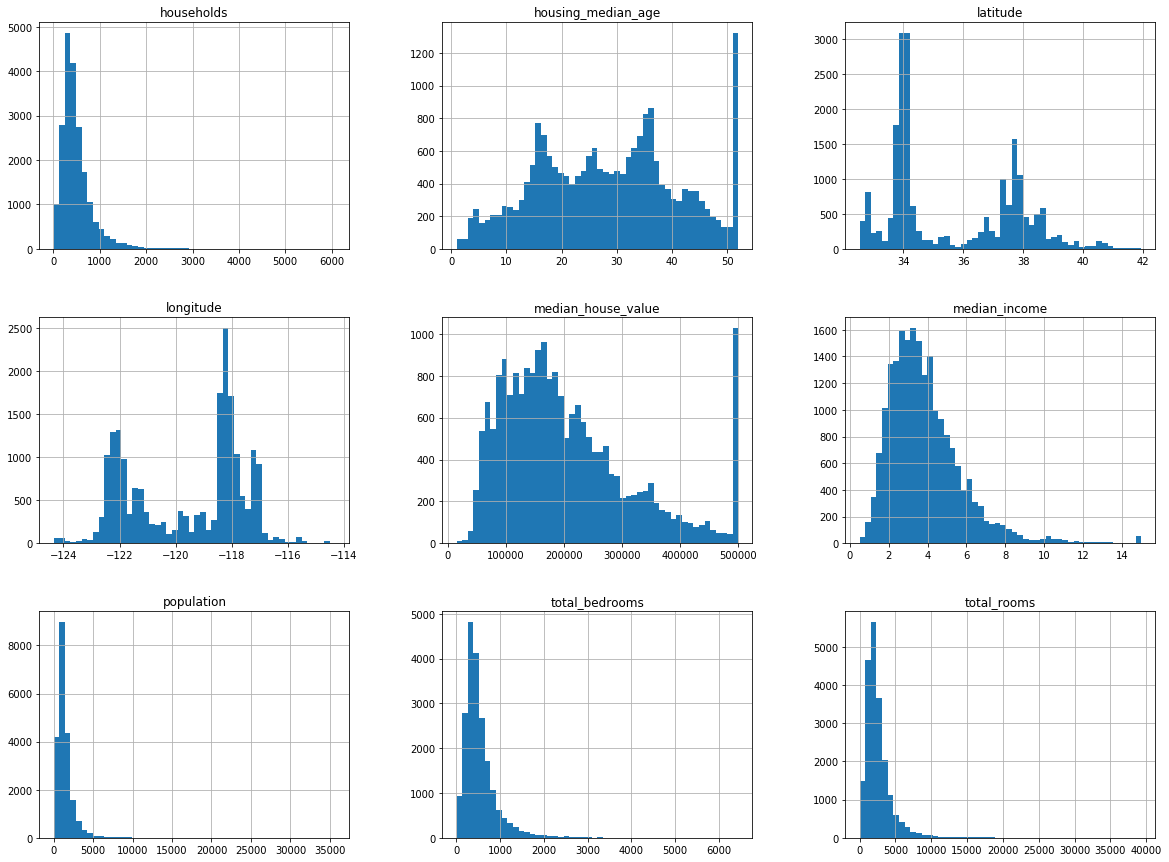

In [10]:
# plot histogram of all numerical Attributes
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Define function for spliting the data

In [11]:
import numpy as np

In [12]:
# function to split data
def split_train_test(data,test_ratio): # specify data and percentage of data for test data
    #randomising indicies
    shuffled_indices = np.random.permutation(len(data)) 
    # test data size is total number of rows * test_ratio 
    test_set_size = int(len(data) * test_ratio)
    #from randomised indices select first rows of ratio test_ratio
    test_indices =shuffled_indices[:test_set_size]
    # remaining rows to training
    train_indices = shuffled_indices[test_set_size:]
    # return train and test data
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [13]:
# split the data in to train test using fun 
train_set,test_set = split_train_test(housing,0.2)

In [14]:
# number of rows in train
len(train_set)

16512

In [15]:
# number of rows in test
len(test_set)

4128

## Split data into train test using sklearn

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_set, test_set = train_test_split(housing, test_size= 0.2, random_state=42)

### Stratified Sampling

We know median income is an impotant Attribute for our prediction of housing value. As median income is a continous value we will bin it into 5 categories, to keep it simple lets label them as 1,2,3,4,5 only.

In [18]:
# break the "median_income" to 5 parts i.e. ordinal value and store it in "income_cat"
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1,2,3,4,5]) 

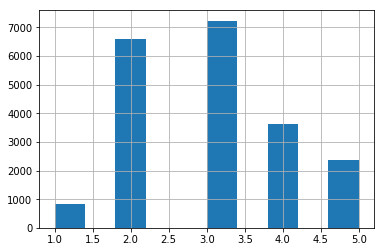

In [19]:
# plot income_cat
housing['income_cat'].hist()


## Stratified Sampling for "median_income" using "income_cat"


Previously the sampling method used was purely random. This is good if the data is very large.

Now we have assume the Attribute median_income is an important attriute and we need to create train and test sample which has same distribution of median_income, therefore we will go with **Stratified sampling** for "median_income" using "income_cat" attribute

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [22]:
for train_index,test_index in  split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# Precentage split of values in housing
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [24]:
# Precentage split of values in strat_test_set
strat_train_set['income_cat'].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [25]:
# Precentage split of values in strat_test_set
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

## Plot Stratrified sampled data

Text(0.5, 1.0, 'Housing data')

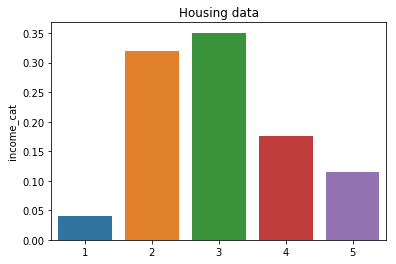

In [26]:
import seaborn as sns
temp = housing['income_cat'].value_counts()/len(housing)
sns.barplot(x = temp.index, y=temp)
plt.title("Housing data")

Text(0.5, 1.0, 'Stratified sample train set')

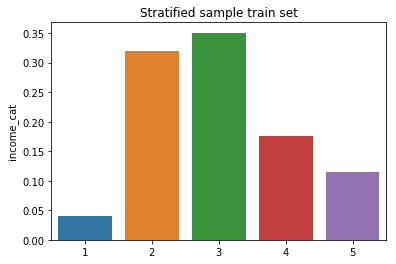

In [27]:
import seaborn as sns
temp = strat_train_set['income_cat'].value_counts()/len(strat_train_set)
sns.barplot(x = temp.index, y=temp )
plt.title("Stratified sample train set")

Text(0.5, 1.0, 'Stratified sample test set')

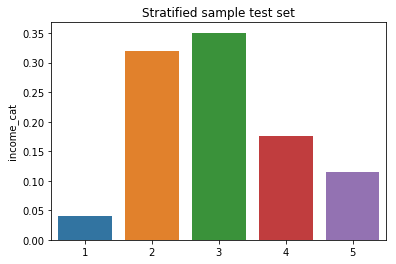

In [28]:
import seaborn as sns
temp = strat_train_set['income_cat'].value_counts()/len(strat_train_set)
sns.barplot(x = temp.index, y=temp )
plt.title("Stratified sample test set")

From above three plots we can conclude the sampled train and test set has the same distribution of **income_cat** as in the housing data

In [29]:
# drop the income_cat attribute from train and test
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace = True)

In [30]:
strat_test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND


In [31]:
# copy the straified train sample to housing variable
housing = strat_train_set.copy()

# Visualizing Geographical data

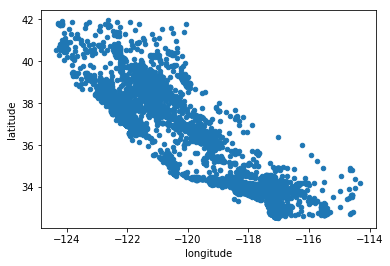

In [32]:
# Visualizing Geographical data
housing.plot(kind="scatter", x="longitude", y="latitude")

Set alpha = 0.1 to view the overlaping of the instance (i.e. density
)

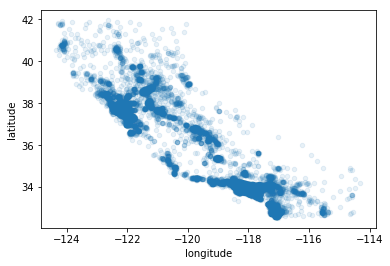

In [33]:
# Visualizing Geographical data
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

### Data visualization of population and median_house_value 

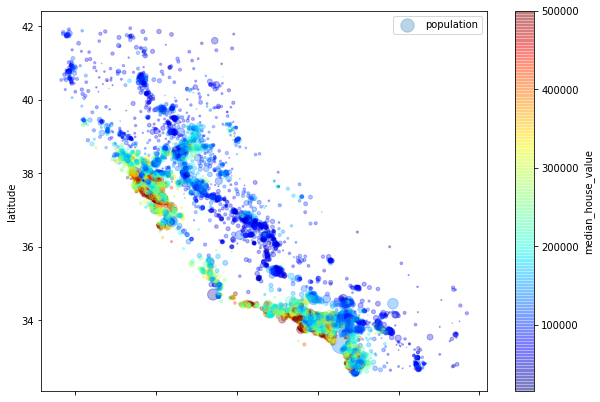

In [34]:
# Visualizing Geographical data
housing.plot( kind="scatter", x="longitude", y="latitude", alpha=0.3,
             s = housing['population']/100, label="population", figsize=(10,7),
             c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )

plt.legend()

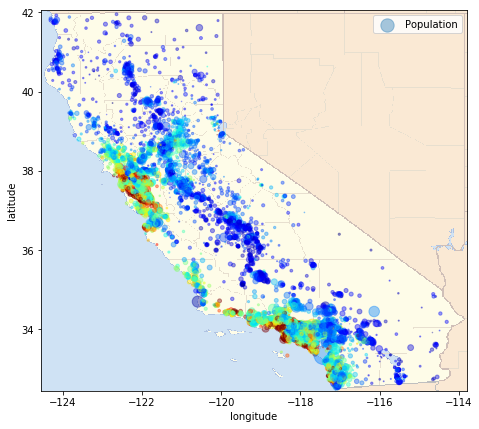

In [35]:
### Data visualization of population and median_house_value on map
import matplotlib.image as mpimg
california_img = mpimg.imread("images/california.png")

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
            s=housing.population/100, label="Population",
            c="median_house_value", cmap = plt.get_cmap("jet"),\
            colorbar=False, alpha=0.4)

plt.imshow(california_img, alpha=0.5, extent=[-124.55, -113.80, 32.45, 42.05],
          cmap=plt.get_cmap("jet"))

* It can be seen the district near sea have more value

In [36]:
# Calculate Correlation
corr_matrix = housing.corr()

In [37]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027ED81ECCF8>,
      dtype=object)

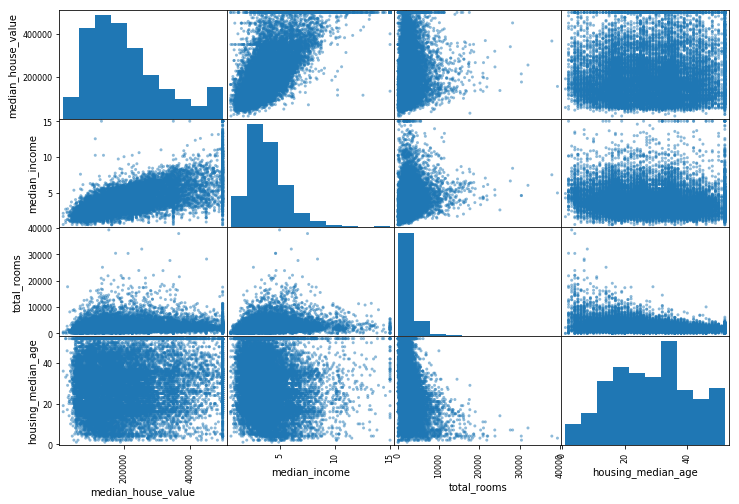

In [38]:
# Scatter plot of important attr
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing[attributes], figsize = (12,8))

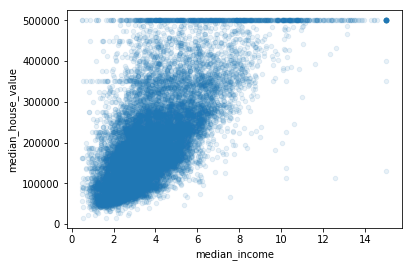

In [39]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.1)

In [40]:
housing.median_house_value.max()

500001.0

**The median_house value maximum value of 500000 and we can see a straight line at that value. This should mean that the median_house values more than 500000 are written as 500001.**

In [41]:
# Create new attr
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["population_per_household"] = housing["population"]/housing['households']

In [42]:
# corr with new attr

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

In [43]:
# Preparing data for model
housing =  strat_train_set.drop("median_house_value",axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [44]:
# deling with NAs
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [45]:
housing_num = housing.drop("ocean_proximity", 1)

In [46]:
imputer.fit(housing_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [49]:
# impute the NAs using trained imputer
X = imputer.transform(housing_num)

In [50]:
# training data with imputed numerical attr
housing_tr = pd.DataFrame(X, columns= housing_num.columns )

In [51]:
# cat attr for training
housing_cat =housing[["ocean_proximity"]]

In [52]:
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [53]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [54]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [55]:
# Convert housing_cat_encoded to one hot encoding(dummy) as the nearby values are not similar

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [56]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin 
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributesAdder( BaseEstimator, TransformerMixin): 
    def __init__( self, add_bedrooms_per_room = True): # no *args or ** kargs 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit( self, X, y = None): 
        return self # nothing else to do 
    def transform( self, X, y = None): 
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            return np.c_[ X, rooms_per_household, population_per_household, bedrooms_per_room] 
        else: 
            return np.c_[ X, rooms_per_household, population_per_household]


In [59]:
attr_adder = CombinedAttributesAdder( add_bedrooms_per_room = False) 
housing_extra_attribs = attr_adder.transform( housing.values)


In [60]:
attr_adder

CombinedAttributesAdder(add_bedrooms_per_room=False)

In [61]:
housing_extra_attribs[0]

array([-121.89, 37.29, 38.0, 1568.0, 351.0, 710.0, 339.0, 2.7042,
       '<1H OCEAN', 4.625368731563422, 2.094395280235988], dtype=object)

In [62]:
housing.iloc[0]

longitude               -121.89
latitude                  37.29
housing_median_age           38
total_rooms                1568
total_bedrooms              351
population                  710
households                  339
median_income            2.7042
ocean_proximity       <1H OCEAN
Name: 17606, dtype: object

# Transformation Pipeline

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
num_pipline = Pipeline([("imputer", SimpleImputer(strategy="median")),
                       ("attr_adder", CombinedAttributesAdder()),
                       ("std_scaler", StandardScaler())
                       ])

In [65]:
housing_num_tr = num_pipline.fit_transform(housing_num)

In [66]:
housing_num_tr[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753])

## Use pipeline to transform num and cat attr together

In [67]:
from sklearn.compose import ColumnTransformer


In [68]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [69]:
full_pipeline = ColumnTransformer([
    ("num", num_pipline, num_attribs),
    ("cat", OneHotEncoder(),cat_attribs)
])

In [70]:
housing_prepared = full_pipeline.fit_transform(housing)

In [71]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Machine Learning Models

## 1. Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_labels) #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## try model on train set itself

In [73]:
some_data = housing.iloc[:5]
some_lables = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions: ", lin_reg.predict(some_data_prepared))

Predictions:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [74]:
print("Lables:", list(some_lables))

Lables: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


# Evaulate the prediction on whole training data

#### Evalulation metrics used is RMSE

In [75]:
from sklearn.metrics import mean_squared_error

In [76]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

# 2. Decision Tree


In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
tree_reg = DecisionTreeRegressor()

In [79]:
 tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [80]:
housing_predictions = tree_reg.predict(housing_prepared)

In [81]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross validation

In [82]:
from sklearn.model_selection import cross_val_score


In [83]:
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,cv=10, scoring="neg_mean_squared_error")

In [84]:
tree_rmse_scores = np.sqrt(-scores)

In [85]:
tree_rmse_scores

array([69327.01708558, 65486.39211857, 71358.25563341, 69091.37509104,
       70570.20267046, 75529.94622521, 69895.20650652, 70660.14247357,
       75843.74719231, 68905.17669382])

In [86]:
# fun to view result
def display_scores(scores):
    print("Scores: ",  scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation", scores.std())


In [87]:
display_scores(tree_rmse_scores)

Scores:  [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean:  70666.74616904806
Standard Deviation 2928.322738055112


## Cross validation for linear regresion


In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lin_reg = LinearRegression()

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
lin_reg_score =  cross_val_score(lin_reg,housing_prepared,housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse = np.sqrt(-lin_reg_score)

In [92]:
def display_scores(scores):
    print("Scores: ",scores)
    print("mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [93]:
display_scores(lin_reg_rmse)

Scores:  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
mean:  69052.46136345083
Standard Deviation:  2731.6740017983425


# 3. Random Forest

In [94]:
from sklearn.ensemble import RandomForestRegressor

In [95]:
forest_reg = RandomForestRegressor()

In [96]:
forest_reg.fit(housing_prepared,housing_labels)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# Cross validation on Random forest

In [97]:
from sklearn.model_selection import cross_val_score

In [98]:
rf_score = cross_val_score(forest_reg,housing_prepared,housing_labels, 
                          scoring="neg_mean_squared_error", cv= 10)

In [99]:
rf_rmse = np.sqrt(-rf_score)

In [100]:
def display_scores(scores):
    print("Scores: ",scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation:" , scores.std())

In [101]:
display_scores(rf_rmse)

Scores:  [52868.21871547 49194.92340594 51713.77716246 55012.10310441
 50973.88861214 55990.4479905  52298.68285092 50953.09058463
 54428.48087563 53461.73225682]
Mean:  52689.53455589254
Standard Deviation: 1980.36257012708


## Saving model


In [102]:
from sklearn.externals import joblib

In [103]:
# save the model
joblib.dump(forest_reg,"random_forest.pkl")

['random_forest.pkl']

In [104]:
# load the model
rf_load = joblib.load("random_forest.pkl")

In [105]:
rf_load.predict(housing_prepared)

array([248660. , 311190. , 226410. , ..., 101560. , 207600. , 432390.5])

# Fine tuning the model  
## Grid search

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
param_grid = [
     # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':[3,10,30], "max_features":[2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {"bootstrap":[False], "n_estimators":[3, 10], "max_features":[2,3,4]}         
             ]

In [108]:
forest_reg = RandomForestRegressor(random_state=33)

In [109]:
grid_search = GridSearchCV(forest_reg,param_grid, cv=5,
                          scoring="neg_mean_squared_error",
                           return_train_score=True
                          )

In [110]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=33, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [111]:
# view best hyperparameter
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [112]:
# best estimator
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False, random_state=33,
           verbose=0, warm_start=False)

In [113]:
# ecaluation Scores
cvres = grid_search.cv_results_

In [114]:
for mean_score, params  in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

65251.4389852312 {'max_features': 2, 'n_estimators': 3}
55924.567996297985 {'max_features': 2, 'n_estimators': 10}
53316.19478616327 {'max_features': 2, 'n_estimators': 30}
61034.28225812789 {'max_features': 4, 'n_estimators': 3}
54039.660912948486 {'max_features': 4, 'n_estimators': 10}
51078.26181943995 {'max_features': 4, 'n_estimators': 30}
60127.090163395 {'max_features': 6, 'n_estimators': 3}
52587.674372050016 {'max_features': 6, 'n_estimators': 10}
49997.029233573645 {'max_features': 6, 'n_estimators': 30}
59053.72544534784 {'max_features': 8, 'n_estimators': 3}
52091.28809064915 {'max_features': 8, 'n_estimators': 10}
50202.34651607652 {'max_features': 8, 'n_estimators': 30}
63258.77959098114 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54765.91865271165 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
62085.487770618194 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53317.04177188458 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [115]:
np.sqrt(-cvres['mean_train_score'])

array([ 3.35425513e+04,  2.41850725e+04,  2.08832839e+04,  3.14434770e+04,
        2.31129339e+04,  1.98944667e+04,  3.06527224e+04,  2.25740756e+04,
        1.95471205e+04,  3.04568882e+04,  2.23329359e+04,  1.96324029e+04,
        2.29289298e+01,  2.39245155e+01,  9.17157190e-01,  8.58411291e+00,
       -0.00000000e+00, -0.00000000e+00])

In [116]:
np.sqrt(-cvres["mean_test_score"])

array([65251.43898523, 55924.5679963 , 53316.19478616, 61034.28225813,
       54039.66091295, 51078.26181944, 60127.09016339, 52587.67437205,
       49997.02923357, 59053.72544535, 52091.28809065, 50202.34651608,
       63258.77959098, 54765.91865271, 62085.48777062, 53317.04177188,
       59844.60892929, 52757.1657644 ])

# Analyze the best model and their errors

In [117]:
# important coloums of best model
feature_importance = grid_search.best_estimator_.feature_importances_

In [118]:
feature_importance

array([6.97218800e-02, 6.20434336e-02, 4.46322877e-02, 1.85593624e-02,
       1.76538899e-02, 1.75172502e-02, 1.68607564e-02, 3.45952917e-01,
       5.06852614e-02, 1.06344196e-01, 8.12335041e-02, 1.22211441e-02,
       1.49173573e-01, 1.21473668e-04, 3.63196906e-03, 3.64710119e-03])

In [119]:
# display importance score next to their corrresponding attribute names
extra_attribs = ["rooms_per_hhold", "pop_per_hold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [120]:
sorted(zip(feature_importance,attributes),reverse=True)

[(0.345952916518449, 'median_income'),
 (0.14917357339190965, 'INLAND'),
 (0.10634419636003872, 'pop_per_hold'),
 (0.08123350411583975, 'bedrooms_per_room'),
 (0.06972187998501748, 'longitude'),
 (0.06204343361615615, 'latitude'),
 (0.050685261370658326, 'rooms_per_hhold'),
 (0.044632287735582886, 'housing_median_age'),
 (0.018559362416235296, 'total_rooms'),
 (0.01765388985521823, 'total_bedrooms'),
 (0.01751725017803305, 'population'),
 (0.01686075644266203, 'households'),
 (0.01222114409384151, '<1H OCEAN'),
 (0.003647101192769922, 'NEAR OCEAN'),
 (0.003631969059239113, 'NEAR BAY'),
 (0.0001214736683487738, 'ISLAND')]

# Evaulate the final model on test data

In [121]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

In [122]:
final_mse = mean_squared_error(y_test, final_predictions)

In [123]:
final_rmse = np.sqrt(final_mse)

In [124]:
final_rmse

48016.38393352883